In [3]:
!pip install imbalanced-learn --user

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [42]:
# check version number
import imblearn
print(imblearn.__version__)

#import libraries
import pandas as pd 
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

0.8.0


### Load and summarize the dataset


Class=0, n=3222 (26.352%)
Class=1, n=3118 (25.501%)
Class=2, n=2912 (23.816%)
Class=3, n=2606 (21.313%)
Class=4, n=369 (3.018%)


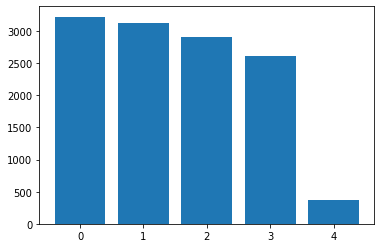

In [43]:


# load the csv file as a data frame
df = pd.read_csv('train3.csv')
data = df.values
# split into input and output elements
X=df._get_numeric_data()
X=X.drop(['regression_popularity','id','rp>0','rp>1','rp>2','rp>3'], axis = 1) 
# label encode the target variable
y=df['regression_popularity']


# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

### Oversampling

In [44]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


In [45]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


Class=0, n=3222 (20.000%)
Class=1, n=3222 (20.000%)
Class=2, n=3222 (20.000%)
Class=3, n=3222 (20.000%)
Class=4, n=3222 (20.000%)


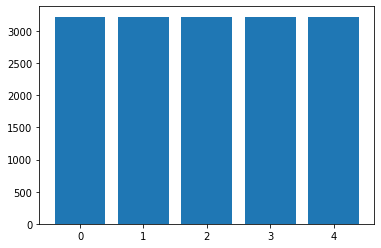

In [46]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()



In [30]:
X

,Unnamed: 0,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,mode*tempo,month
0,0,0.949000,0.235000,0.027600,0,9.270000e-01,5,0.513000,-27.398000,0.038100,110.838000,0.039800,1947,3.000000,110.838000,1
1,1,0.855000,0.456000,0.485000,0,8.840000e-02,4,0.151000,-10.046000,0.043700,152.066000,0.859000,2020,2.400000,152.066000,11
2,2,0.827000,0.495000,0.499000,0,0.000000e+00,0,0.401000,-8.009000,0.047400,108.004000,0.709000,1950,2.600000,-108.004000,1
3,3,0.654000,0.643000,0.469000,0,1.080000e-01,7,0.218000,-15.917000,0.036800,83.636000,0.964000,1974,2.400000,83.636000,4
4,4,0.738000,0.705000,0.311000,0,0.000000e+00,5,0.322000,-12.344000,0.048800,117.260000,0.785000,1973,3.400000,117.260000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,7327,0.162213,0.609802,0.718413,1,7.269436e-03,7,0.122864,-5.366839,0.054825,94.296746,0.450639,2018,3.004922,-94.296746,7
16106,11601,0.367916,0.657642,0.640007,1,2.910168e-04,3,0.313855,-5.855546,0.186599,139.484167,0.332660,2019,2.848478,139.484167,10
16107,11486,0.013619,0.681191,0.735518,0,9.478127e-06,4,0.192030,-5.771065,0.126037,103.397791,0.386931,2020,2.827670,103.397791,3
16108,11283,0.155203,0.766797,0.647238,0,0.000000e+00,3,0.124083,-6.319490,0.383754,138.668008,0.392806,2019,2.713285,138.668008,7


In [33]:
y=pd.DataFrame(y)

In [39]:
new_df=pd.concat([X,y],axis=1)
new_df

,Unnamed: 0,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,mode*tempo,month,regression_popularity
0,0,0.949000,0.235000,0.027600,0,9.270000e-01,5,0.513000,-27.398000,0.038100,110.838000,0.039800,1947,3.000000,110.838000,1,0
1,1,0.855000,0.456000,0.485000,0,8.840000e-02,4,0.151000,-10.046000,0.043700,152.066000,0.859000,2020,2.400000,152.066000,11,1
2,2,0.827000,0.495000,0.499000,0,0.000000e+00,0,0.401000,-8.009000,0.047400,108.004000,0.709000,1950,2.600000,-108.004000,1,0
3,3,0.654000,0.643000,0.469000,0,1.080000e-01,7,0.218000,-15.917000,0.036800,83.636000,0.964000,1974,2.400000,83.636000,4,1
4,4,0.738000,0.705000,0.311000,0,0.000000e+00,5,0.322000,-12.344000,0.048800,117.260000,0.785000,1973,3.400000,117.260000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,7327,0.162213,0.609802,0.718413,1,7.269436e-03,7,0.122864,-5.366839,0.054825,94.296746,0.450639,2018,3.004922,-94.296746,7,4
16106,11601,0.367916,0.657642,0.640007,1,2.910168e-04,3,0.313855,-5.855546,0.186599,139.484167,0.332660,2019,2.848478,139.484167,10,4
16107,11486,0.013619,0.681191,0.735518,0,9.478127e-06,4,0.192030,-5.771065,0.126037,103.397791,0.386931,2020,2.827670,103.397791,3,4
16108,11283,0.155203,0.766797,0.647238,0,0.000000e+00,3,0.124083,-6.319490,0.383754,138.668008,0.392806,2019,2.713285,138.668008,7,4


In [40]:

new_df['rp>0']=[int(i) for i in new_df['regression_popularity']>0]
new_df['rp>1']=[int(i) for i in new_df['regression_popularity']>1]
new_df['rp>2']=[int(i) for i in new_df['regression_popularity']>2]
new_df['rp>3']=[int(i) for i in new_df['regression_popularity']>3]

new_df

,Unnamed: 0,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,speechiness,...,valence,year,duration-min,mode*tempo,month,regression_popularity,rp>0,rp>1,rp>2,rp>3
0,0,0.949000,0.235000,0.027600,0,9.270000e-01,5,0.513000,-27.398000,0.038100,...,0.039800,1947,3.000000,110.838000,1,0,0,0,0,0
1,1,0.855000,0.456000,0.485000,0,8.840000e-02,4,0.151000,-10.046000,0.043700,...,0.859000,2020,2.400000,152.066000,11,1,1,0,0,0
2,2,0.827000,0.495000,0.499000,0,0.000000e+00,0,0.401000,-8.009000,0.047400,...,0.709000,1950,2.600000,-108.004000,1,0,0,0,0,0
3,3,0.654000,0.643000,0.469000,0,1.080000e-01,7,0.218000,-15.917000,0.036800,...,0.964000,1974,2.400000,83.636000,4,1,1,0,0,0
4,4,0.738000,0.705000,0.311000,0,0.000000e+00,5,0.322000,-12.344000,0.048800,...,0.785000,1973,3.400000,117.260000,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,7327,0.162213,0.609802,0.718413,1,7.269436e-03,7,0.122864,-5.366839,0.054825,...,0.450639,2018,3.004922,-94.296746,7,4,1,1,1,1
16106,11601,0.367916,0.657642,0.640007,1,2.910168e-04,3,0.313855,-5.855546,0.186599,...,0.332660,2019,2.848478,139.484167,10,4,1,1,1,1
16107,11486,0.013619,0.681191,0.735518,0,9.478127e-06,4,0.192030,-5.771065,0.126037,...,0.386931,2020,2.827670,103.397791,3,4,1,1,1,1
16108,11283,0.155203,0.766797,0.647238,0,0.000000e+00,3,0.124083,-6.319490,0.383754,...,0.392806,2019,2.713285,138.668008,7,4,1,1,1,1


In [41]:
df.to_csv('train4.csv') 